# Introducción

El objetivo de esta práctica es mostrar al alumno las posibilidades que ofrece R para analizar datos de distintas fuentes diferentes, extraer datos, comparar, hacer gráficas y sacar estadísticos.

Las fuentes de datos que se tienen son:
* Datos meteorológicos de Praga de 1775 hasta 2004: https://www.ncdc.noaa.gov/cdo-web/datasets
* Banco mundial: https://data.worldbank.org/topic/climate-change
* Nivel de CO2 en la atmósfera (Mauna Loa): https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html

Todos los ficheros necesarios para resolver la práctica se ofrecen como adjuntos.

## Datos meteorológicos NOAA

Carga el tiempo meteorológico de Praga en un data.frame. Fichero: *EZE00100082*

In [386]:
weatherPraga<-read.csv("./datos/EZE00100082.csv", sep = ",")

Mostrar los 10 años que más precipitiaciones han tenido junto con su valor correspondiente (columna PRCP):

In [387]:
datasetPrecipitaciones <- data.frame(weatherPraga$PRCP,weatherPraga$DATE)
colnames(datasetPrecipitaciones) <- c("PRCP","DATE")
datasetPrecipitaciones <- na.omit(datasetPrecipitaciones)
head(datasetPrecipitaciones[order(-datasetPrecipitaciones$PRCP),],n=10)


,PRCP,DATE
165,745.5,1939
54,665.4,1828
228,661.5,2002
172,638.3,1946
116,637.3,1890
63,634.9,1837
184,633.1,1958
57,625.7,1831
192,624.1,1966
55,622.4,1829


* Muestra en un diagrama de dispersión la temperatura mínima registrada en un año (columna EMNT) en función del año registrado (columna DATE).
* Crear una regresión lineal (polinomio orden 1) que muestre la tendencia. Pintarla sobre el diagrama de dispersión.
* En media, ¿Cuantos grados ha aumentado la temperatura mínima cada año? (pendiente de la  regresión lineal)

[1] "La temperatura media ha aumentado 0.02 grados al año"


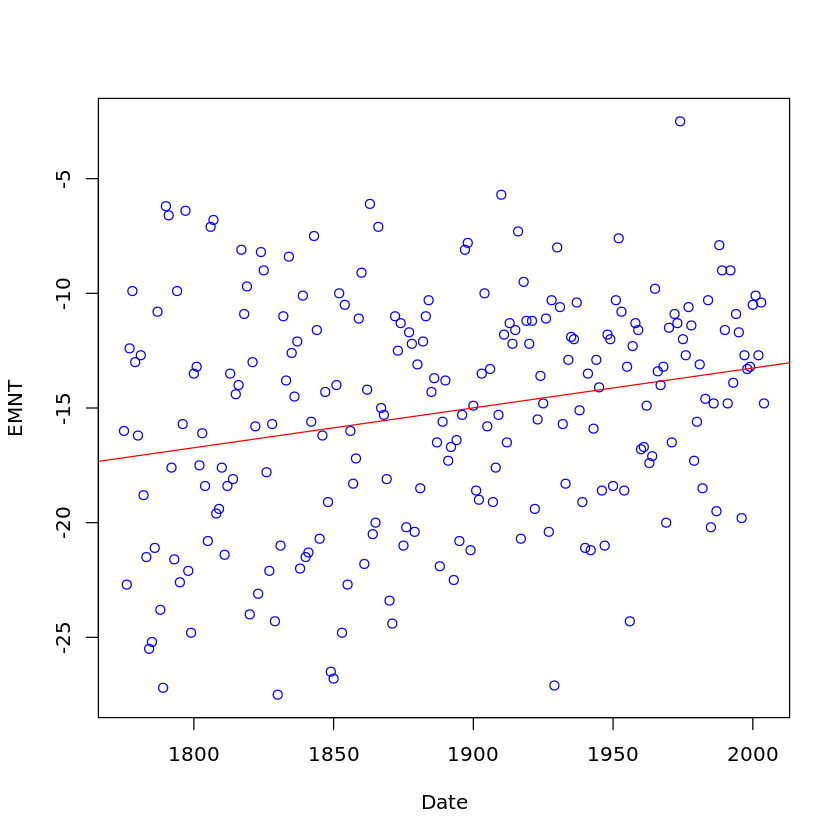

In [388]:
datasetTemp <- data.frame(weatherPraga$DATE,weatherPraga$EMNT)
colnames(datasetTemp) <- c("DATE","EMNT")
datasetTemp <- na.omit(datasetTemp)
model <- lm(data=datasetTemp, formula = EMNT ~ DATE)
pend <- round(summary(model)$coefficients[2,1],digits=2)
print(paste(paste("La temperatura media ha aumentado",pend),"grados al año"))
plot(datasetTemp$DATE,datasetTemp$EMNT,col="blue",xlab="Date",ylab="EMNT")
abline(model$coefficients,col="red")

¿Ha subido realmente la temperatura mínima?
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1775,1794]
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1985,2004]
* ¿Cual es la diferencia entre ambos? ¿Es estadísticamente significativa?
  * Nota: antes de aplicar un test estadístico hay que ver si cumple con los requisitos de ese test.

In [389]:
datasetTempFilt1 <- datasetTemp[1775<=datasetTemp$DATE & datasetTemp$DATE<=1794,]
datasetTempFilt2 <- datasetTemp[1985<=datasetTemp$DATE & datasetTemp$DATE<=2004,]
mean1 <- mean(datasetTempFilt1$EMNT)
mean2 <- mean(datasetTempFilt2$EMNT)
meanDif <- mean2 - mean1
print(paste("La temperatura minima media en el intervalo 1775-1794 es de",mean1 ))
print(paste("La temperatura minima media en el intervalo 1985-2004 es de",mean2 ))
print(paste("La diferencia entre ambos es",meanDif ))

[1] "La temperatura minima media en el intervalo 1775-1794 es de -16.935"
[1] "La temperatura minima media en el intervalo 1985-2004 es de -13.04"
[1] "La diferencia entre ambos es 3.895"


Hipotesis Nula --> El valor medio del segundo intervalo es mayor que el del primero

Suponemos que la toma de temperaturas se ha realizado por muestreo aleatorio simple

Primero realizamos un test de shapiro para asegurarnos que la muestra sigue una distribución normal

Dado que ambas muestras son subconjuntos de la misma población, asumimos que tienen la misma varianza

Con estas condiciones, podremos realizar un test de Student unilateral para validar la hipotesis

In [393]:
shapiro.test(datasetTempFilt1$EMNT)
shapiro.test(datasetTempFilt2$EMNT)


	Shapiro-Wilk normality test

data:  datasetTempFilt1$EMNT
W = 0.95089, p-value = 0.3808



	Shapiro-Wilk normality test

data:  datasetTempFilt2$EMNT
W = 0.91373, p-value = 0.0751


In [396]:
t.test(datasetTempFilt1$EMNT,datasetTempFilt2$EMNT,var.equal=TRUE,alternative = "greater") 


	Two Sample t-test

data:  datasetTempFilt1$EMNT and datasetTempFilt2$EMNT
t = -2.3499, df = 38, p-value = 0.988
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -6.689466       Inf
sample estimates:
mean of x mean of y 
  -16.935   -13.040 


Con esto comprobamos que es estadisticamente significativa la diferencia

## Datos banco mundial

Carga los datos del banco mundial

In [72]:
databank<-read.csv("./datos/API_19_DS2_en_csv_v2.csv",skip=4)
#Borramos las X del nombre de la columna
colnames(databank)<-gsub("X","",colnames(databank))

countryData<-read.csv("./datos/Metadata_Country_API_19_DS2_en_csv_v2.csv")

# De esta forma podremos aceder a la información de paises usando su countryCode
rownames(countryData)<-countryData$Country.Code

realCountryData<-subset(countryData,IncomeGroup!="")
regionData<-subset(countryData,IncomeGroup=="")
print(paste("Tenemos un total de",nrow(realCountryData),"paises"))
print(paste("Tenemos un total de",nrow(regionData),"regiones"))
indicators<-read.csv("./datos/Metadata_Indicator_API_19_DS2_en_csv_v2.csv")
print(paste("Tenemos un total de",nrow(indicators),"indicadores"))

[1] "Tenemos un total de 217 paises"
[1] "Tenemos un total de 46 regiones"
[1] "Tenemos un total de 80 indicadores"


¿Cual fue el país que más toneladas de CO2 equivalente emitió en 1970 (Mostrar *Country.Name*)?
¿Cuanto contaminó?

Hay un dataframe con la lista de paises en *realCountryData*
El número de toneladas de CO2 equivalente viene dado por el Indicator.Code *"EN.ATM.GHGT.KT.CE"*


In [186]:
datosCO2 <- databank[databank$Indicator.Code=="EN.ATM.GHGT.KT.CE",]
datosCO2.Paises <- subset(datosCO2,Country.Code %in% realCountryData$Country.Code)
datosCO2.1970 <- data.frame(datosCO2.Paises$Country.Name, datosCO2.Paises$'1970')
datosCO2.1970 <- na.omit(datosCO2.1970)
colnames(datosCO2.1970) <- c("Country","CO2")
max <- max(datosCO2.1970$CO2)
datosPaisMax <- datosCO2.1970[datosCO2.1970$CO2==max,]
print(paste("El pais que mas CO2 emitió en 1970 fue",datosPaisMax[1,1],"con unas emisiones de",datosPaisMax[1,2],"KT"))

[1] "El pais que mas CO2 emitió en 1970 fue United States con unas emisiones de 5400503.5 KT"


¿Cuales fueron los 5 países que más toneladas de CO2 equivalente emitieron en 2012? ¿Cuantas kt emitieron?

In [173]:
datosCO2.2012 <- data.frame(datosCO2.Paises$Country.Name, datosCO2.Paises$'2012')
datosCO2.2012 <- na.omit(datosCO2.2012)
colnames(datosCO2.2012) <- c("Country","CO2(Kt)")
head(datosCO2.2012[order(-datosCO2.2012$CO2),],n=5)

,Country,CO2(Kt)
37,China,12454711
204,United States,6343841
90,India,3002895
27,Brazil,2989418
166,Russian Federation,2803398


¿Cual ha sido la media del **porcentaje** de crecimiento de las emisiones de CO2 equivalente en China desde 2000 hasta 2012?

In [183]:
library(reshape2)
datosCO2.china <- databank[databank$Indicator.Code=="EN.ATM.GHGT.KT.CE" & databank$Country.Code=="CHN",]
datosCO2.china <- na.omit(melt(datosCO2.china,id=c("Country.Name","Country.Code","Indicator.Name","Indicator.Code")))
datosCO2.china$variable <- as.numeric(as.character(datosCO2.china$variable))
datosCO2.china <- datosCO2.china[datosCO2.china$variable %in% c(2000:2012),]
#No hay datos de 1999 para saber el incremento en el 2000 por lo que este año no se tendra en cuanta para la media
datosResta <- c(0, datosCO2.china[datosCO2.china$variable %in% c(2000:2011),"value"])
datosCO2.china$incremento <- datosCO2.china$value - datosResta
datosCO2.china$P.incremento <- datosCO2.china$incremento / datosCO2.china$value * 100
mediaCrecimiento <- round(mean(datosCO2.china[datosCO2.china$variable %in% c(2001:2012),]$P.incremento),digits=2)
print(paste("la media del porcentaje de crecimiento en los años indicados ha sido de", mediaCrecimiento, "%"))

[1] "la media del porcentaje de crecimiento en los años indicados ha sido de 7.14 %"


Compara las emisiones de CO2(kt) per cápita (clave en Indicator.Code: *EN.ATM.CO2E.PC*) de todos los paises en 1960,1990 y 2014 mediante:
* diagrama de cajas
* histograma
* curvas de densidad

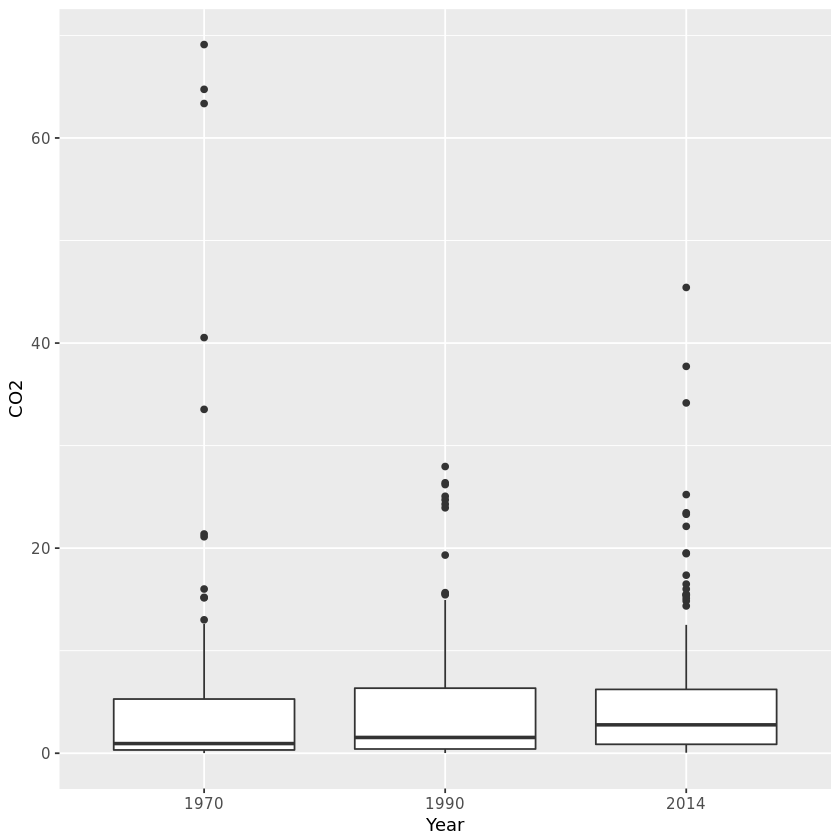

In [206]:
datosCO2 <- databank[databank$Indicator.Code=="EN.ATM.CO2E.PC",]
datosCO2.Paises <- subset(datosCO2,Country.Code %in% realCountryData$Country.Code)
datosCO2.60.90.14 <- data.frame(datosCO2.Paises$Country.Name, datosCO2.Paises$'1970',datosCO2.Paises$'1990',datosCO2.Paises$'2014')
colnames(datosCO2.60.90.14) <- c("Country","1970","1990","2014")
datosCO2.60.90.14 <- melt(datosCO2.60.90.14,id=c("Country"))
colnames(datosCO2.60.90.14) <- c("Country","Year","CO2")
datosCO2.60.90.14 <- na.omit(datosCO2.60.90.14)
library("ggplot2")
ggplot(data=datosCO2.60.90.14,aes(x=Year,y=CO2))+geom_boxplot()

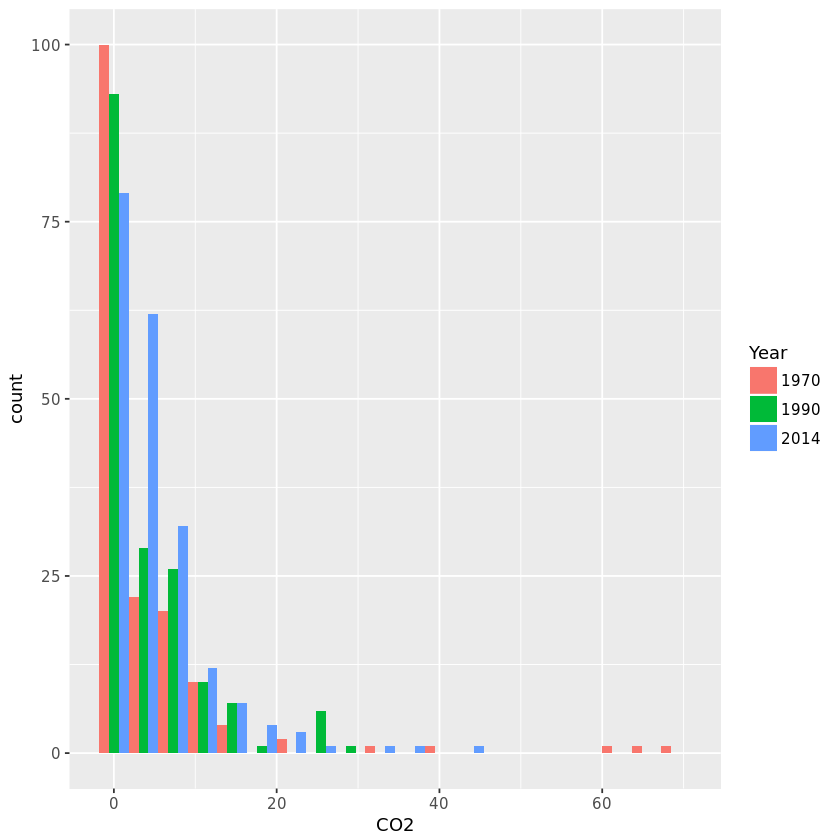

In [214]:
ggplot(data=datosCO2.60.90.14,aes(x=CO2,fill=Year))+geom_histogram(bins = 20,position="dodge")

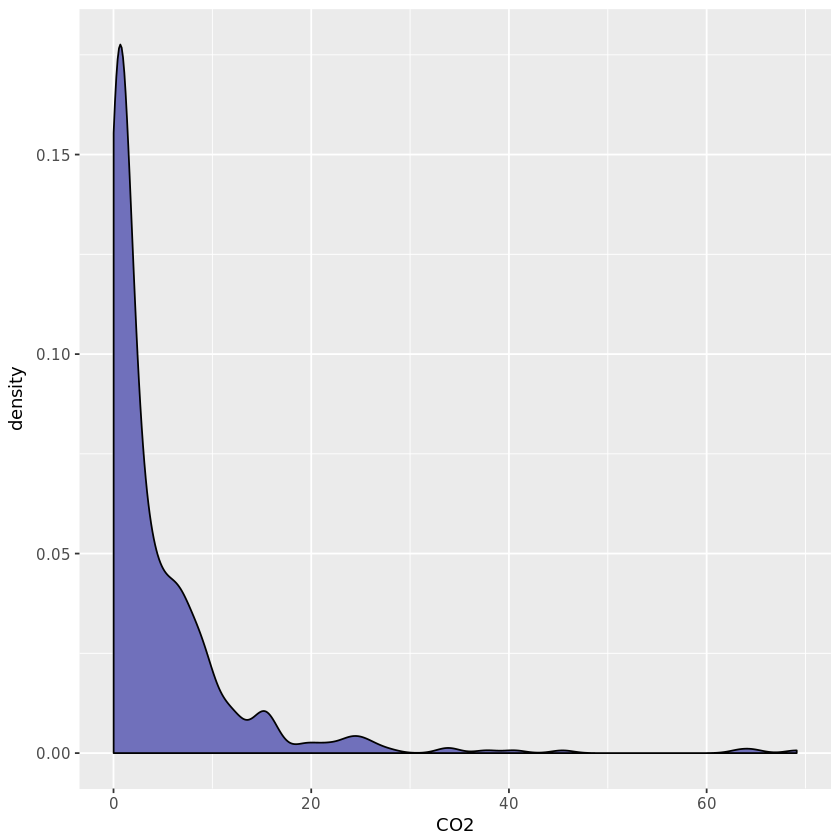

In [217]:
ggplot(data=datosCO2.60.90.14,aes(x=CO2))+geom_density(fill="#7070BB",color="#010101")

Utilizando ggplot: Compara en una gráfica las emisiones totales de CO2(kt) en función del año de las siguientes regiones:
* Mundo entero: WLD
* Unión europea: EUU
* Africa subsahariana: SSA
* Norteamérica: NAC
* Este de Asia y pacífico: TEA

Ayuda: Tendrás que usar la función *melt()* para transformar los años, cada año en una columna, en un data.frame donde cada uno esté en una fila.

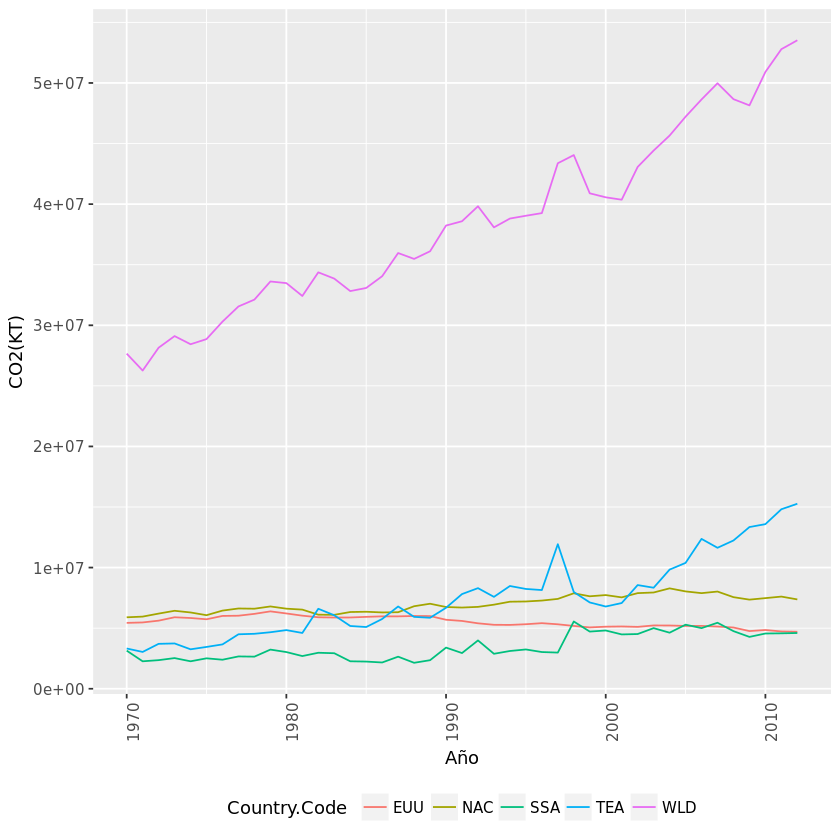

In [270]:
regiones <- c("WLD","EUU","SSA","NAC","TEA")
datosCO2Regiones <- databank[databank$Indicator.Code=="EN.ATM.GHGT.KT.CE" & databank$Country.Code %in% regiones,]
datosCO2Regiones <- na.omit(melt(datosCO2Regiones,id=c("Country.Name","Country.Code","Indicator.Name","Indicator.Code")))
datosCO2Regiones$variable <- as.numeric(as.character(datosCO2Regiones$variable))
library("ggplot2")
ggplot(data=datosCO2Regiones,aes(x=variable,y=value)) + geom_line(aes(color=Country.Code)) + theme(axis.text.x = element_text(angle = 90, hjust = 1), legend.position="bottom") +xlab("Año")+ylab("CO2(KT)")



Suponiendo que la tendencia se mantiene, es decir, que no se aplica ninguna política a nivel global de reducción de emisiones de CO2, ¿cual sería el total de emisiones de CO2 en todo el mundo en el año 2020?

Para calcularlo utiliza tres modelos lineales:
* Regresión lineal con polinomio grado 1
* Regresión lineal polinomio grado 3
* Regresión lineal polinomio grado 10

Represénta en una gráfica el valor real y el calculado por cada uno de los 3 modelos.

[1] "El total de emisiones para todo el mundo siguiendo un modelo basado en un polinomio de grado 1 seria de 55152033.55 Kt de CO2"
[1] "El total de emisiones para todo el mundo siguiendo un modelo basado en un polinomio de grado 3 seria de 65067658.64 Kt de CO2"
[1] "El total de emisiones para todo el mundo siguiendo un modelo basado en un polinomio de grado 10 seria de 462426958.41 Kt de CO2"


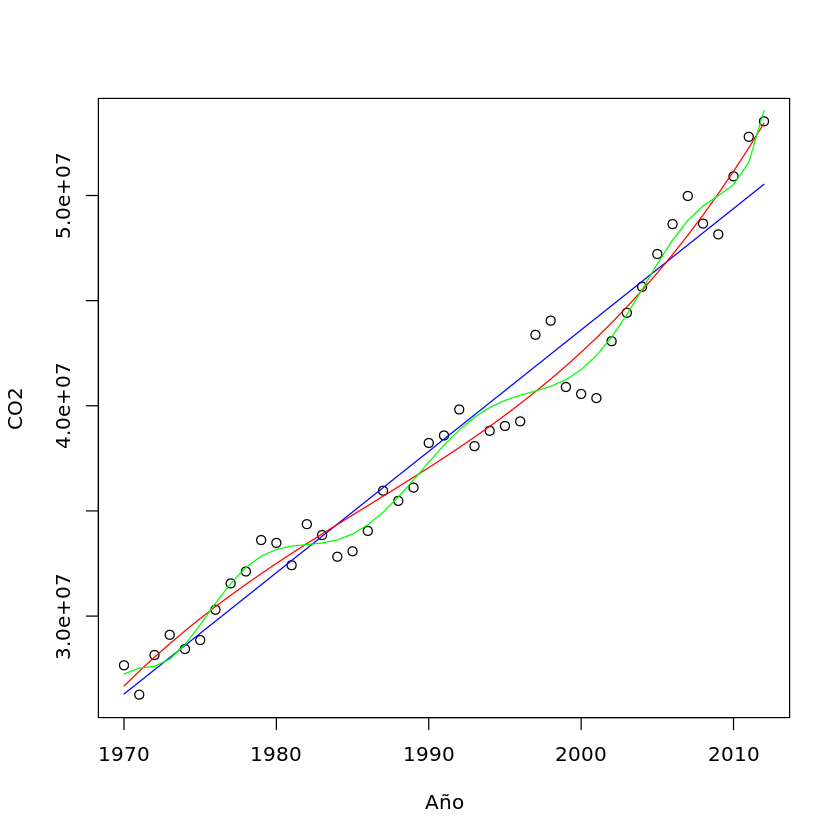

In [345]:
datosCO2Mundial <- databank[databank$Indicator.Code=="EN.ATM.GHGT.KT.CE" & databank$Country.Code %in% c("WLD"),]
datosCO2Mundial <- na.omit(melt(datosCO2Mundial,id=c("Country.Name","Country.Code","Indicator.Name","Indicator.Code")))
datosCO2Mundial <- data.frame(datosCO2Mundial$variable,datosCO2Mundial$value)
colnames(datosCO2Mundial) <- c("year","CO2")
datosCO2Mundial$year <- as.numeric(as.character(datosCO2Mundial$year))

linear.model <- lm(data=datosCO2Mundial, formula = CO2 ~ year)
model3 <- lm(data=datosCO2Mundial, formula = CO2 ~ poly(year,3))
model10 <- lm(data=datosCO2Mundial, formula = CO2 ~ poly(year,10))

predictedcountsL <- predict(linear.model,datosCO2Mundial)
predictedcounts3 <- predict(model3,datosCO2Mundial)
predictedcounts10 <- predict(model10,datosCO2Mundial)

dataPred <- data.frame(c(2020))
colnames(dataPred) <- c("year")
predicted20201 <- predict(linear.model,dataPred)
predicted20203 <- predict(model3,dataPred)
predicted202010 <- predict(model10,dataPred)

print(paste("El total de emisiones para todo el mundo siguiendo un modelo basado en un polinomio de grado 1 seria de",round(predicted20201,digits=2),"Kt de CO2"))
print(paste("El total de emisiones para todo el mundo siguiendo un modelo basado en un polinomio de grado 3 seria de",round(predicted20203,digits=2),"Kt de CO2"))
print(paste("El total de emisiones para todo el mundo siguiendo un modelo basado en un polinomio de grado 10 seria de",round(predicted202010,digits=2),"Kt de CO2"))

plot( datosCO2Mundial$year,datosCO2Mundial$CO2,col="black",xlab="Año",ylab="CO2")
lines(datosCO2Mundial$year,predictedcountsL, col="blue")
lines(datosCO2Mundial$year,predictedcounts3, col="red")
lines(datosCO2Mundial$year,predictedcounts10, col="green")


## Nivel de CO2

En esta parte vamos a trabajar con el nivel medio de CO2 medido por el NOAA en Manuna Loa (Hawai) desde 1968.

In [346]:
co2ppm<-read.csv("./datos/co2_mm_mlo.txt",skip=73,sep="",header = F, 
                 col.names= c("year","month","date","average","interpolated","trend","days"))

Representa el diagrama de dispersión entre:
* CO2 medido en la atmósfera (co2ppm\$interpolated)
* CO2 emitido por todos los países (databank con Indicator.Code=="EN.ATM.CO2E.KT" y Country.Code=="WLD"?

¿Cual es su correlación?


Nota: 

* Los valores en co2ppm vienen en meses, habrá que agregarlos, calcular la media anual a partir de los meses para así poder hacer la correlación con databank.
* Los valores en databank vienen en columnas, habrá que pasarlos a filas utilizando la función *melt*.

[1] "La correlación entre el nivel de CO2 emitido y medido es 0.98 lo que significa que estan altamente correlacionadas de manera directa"


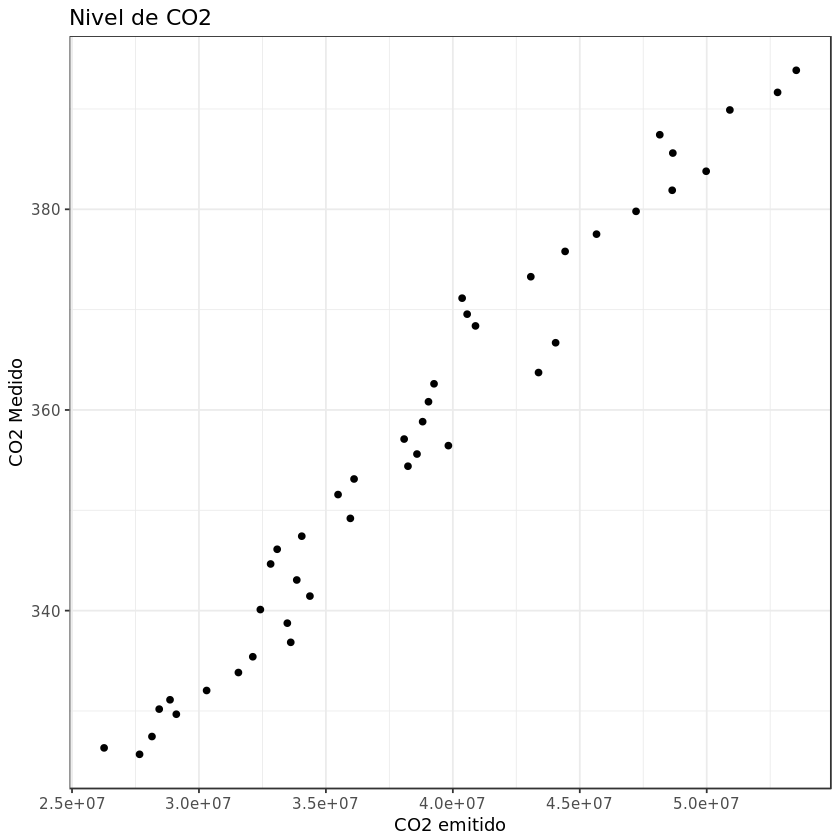

In [372]:
CO2Manuna <- co2ppm[,c("year","interpolated")]
CO2Manuna <- aggregate(CO2Manuna,list(CO2Manuna$year),mean)
CO2Merge <- merge(CO2Manuna, datosCO2Mundial, by = "year")

cr<-cor(CO2Merge$CO2,CO2Merge$interpolated)
print(paste("La correlación entre el nivel de CO2 emitido y medido es",round(cr,2),"lo que significa que estan altamente correlacionadas de manera directa"))
ggplot(data=CO2Merge,aes(x=CO2,y=interpolated))+geom_point()+
    theme_bw()+xlab("CO2 emitido")+ylab("CO2 Medido")+
    ggtitle("Nivel de CO2")


Calcular la matriz de correlación de las siguientes variables:
* Cantidad de CO2 en la atmósfera
* Emisiones totales CO2 en la atmósfera
* Temperatura mínima en praga (columna EMNT).

In [383]:
datasetTemp <- data.frame(weatherPraga$DATE,weatherPraga$EMNT)
colnames(datasetTemp) <- c("year","EMNT")
datasetTemp <- na.omit(datasetTemp)
CORMerge <- merge(CO2Merge, datasetTemp, by = "year")
cor(CORMerge[3:ncol(CORMerge)],use="complete.obs")

,interpolated,CO2,EMNT
interpolated,1.00000000,0.97132281,-0.02421021
CO2,0.97132281,1.00000000,-0.05810697
EMNT,-0.02421021,-0.05810697,1.00000000
